<a href="https://colab.research.google.com/github/ImranMajeedMir/IPL-project-Task4/blob/main/stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK PRICE PREDICTION Internship Task by Asterisc Technocrat PVT LTD**

In [18]:
import numpy as np
import pandas as pd
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for interactiveness
from ipywidgets import interact
import seaborn as sb

In [19]:
from google.colab import files
uploaded = files.upload()

Saving INR=X.csv to INR=X (1).csv


In [20]:
df1 = pd.read_csv('INR=X.csv')
df1.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0


In [21]:
print(df1.shape)

(262, 7)


In [22]:
target = []
for i in df1.columns:
  col = df1[i]
  if type(col[0]) == str:
    target.append(i)
    print(i)

Date


In [23]:
from sklearn.preprocessing import LabelEncoder
for i in target:
  encoder = LabelEncoder()
  encoder.fit(list(df1[i]))
  df1[i] = encoder.fit_transform(df1[i])

In [30]:
# Lets calculate summary statistics
df1.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,130.500000,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,75.777085,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,0.000000,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,65.250000,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,130.500000,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,195.750000,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,261.000000,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >, <Axes: >]],
      dtype=object)

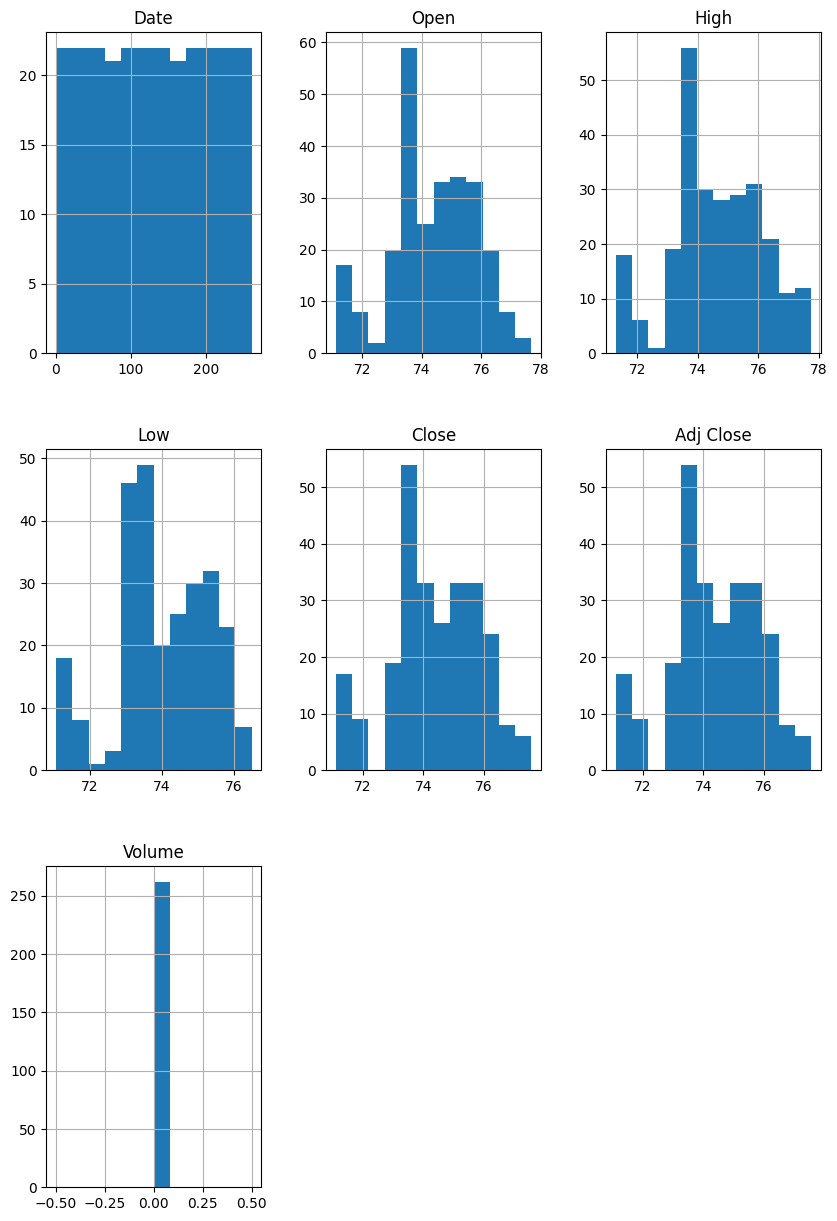

In [31]:
# Now we will visualize the data using histograms
df1.hist(bins=12, figsize=(10,15))

<Axes: >

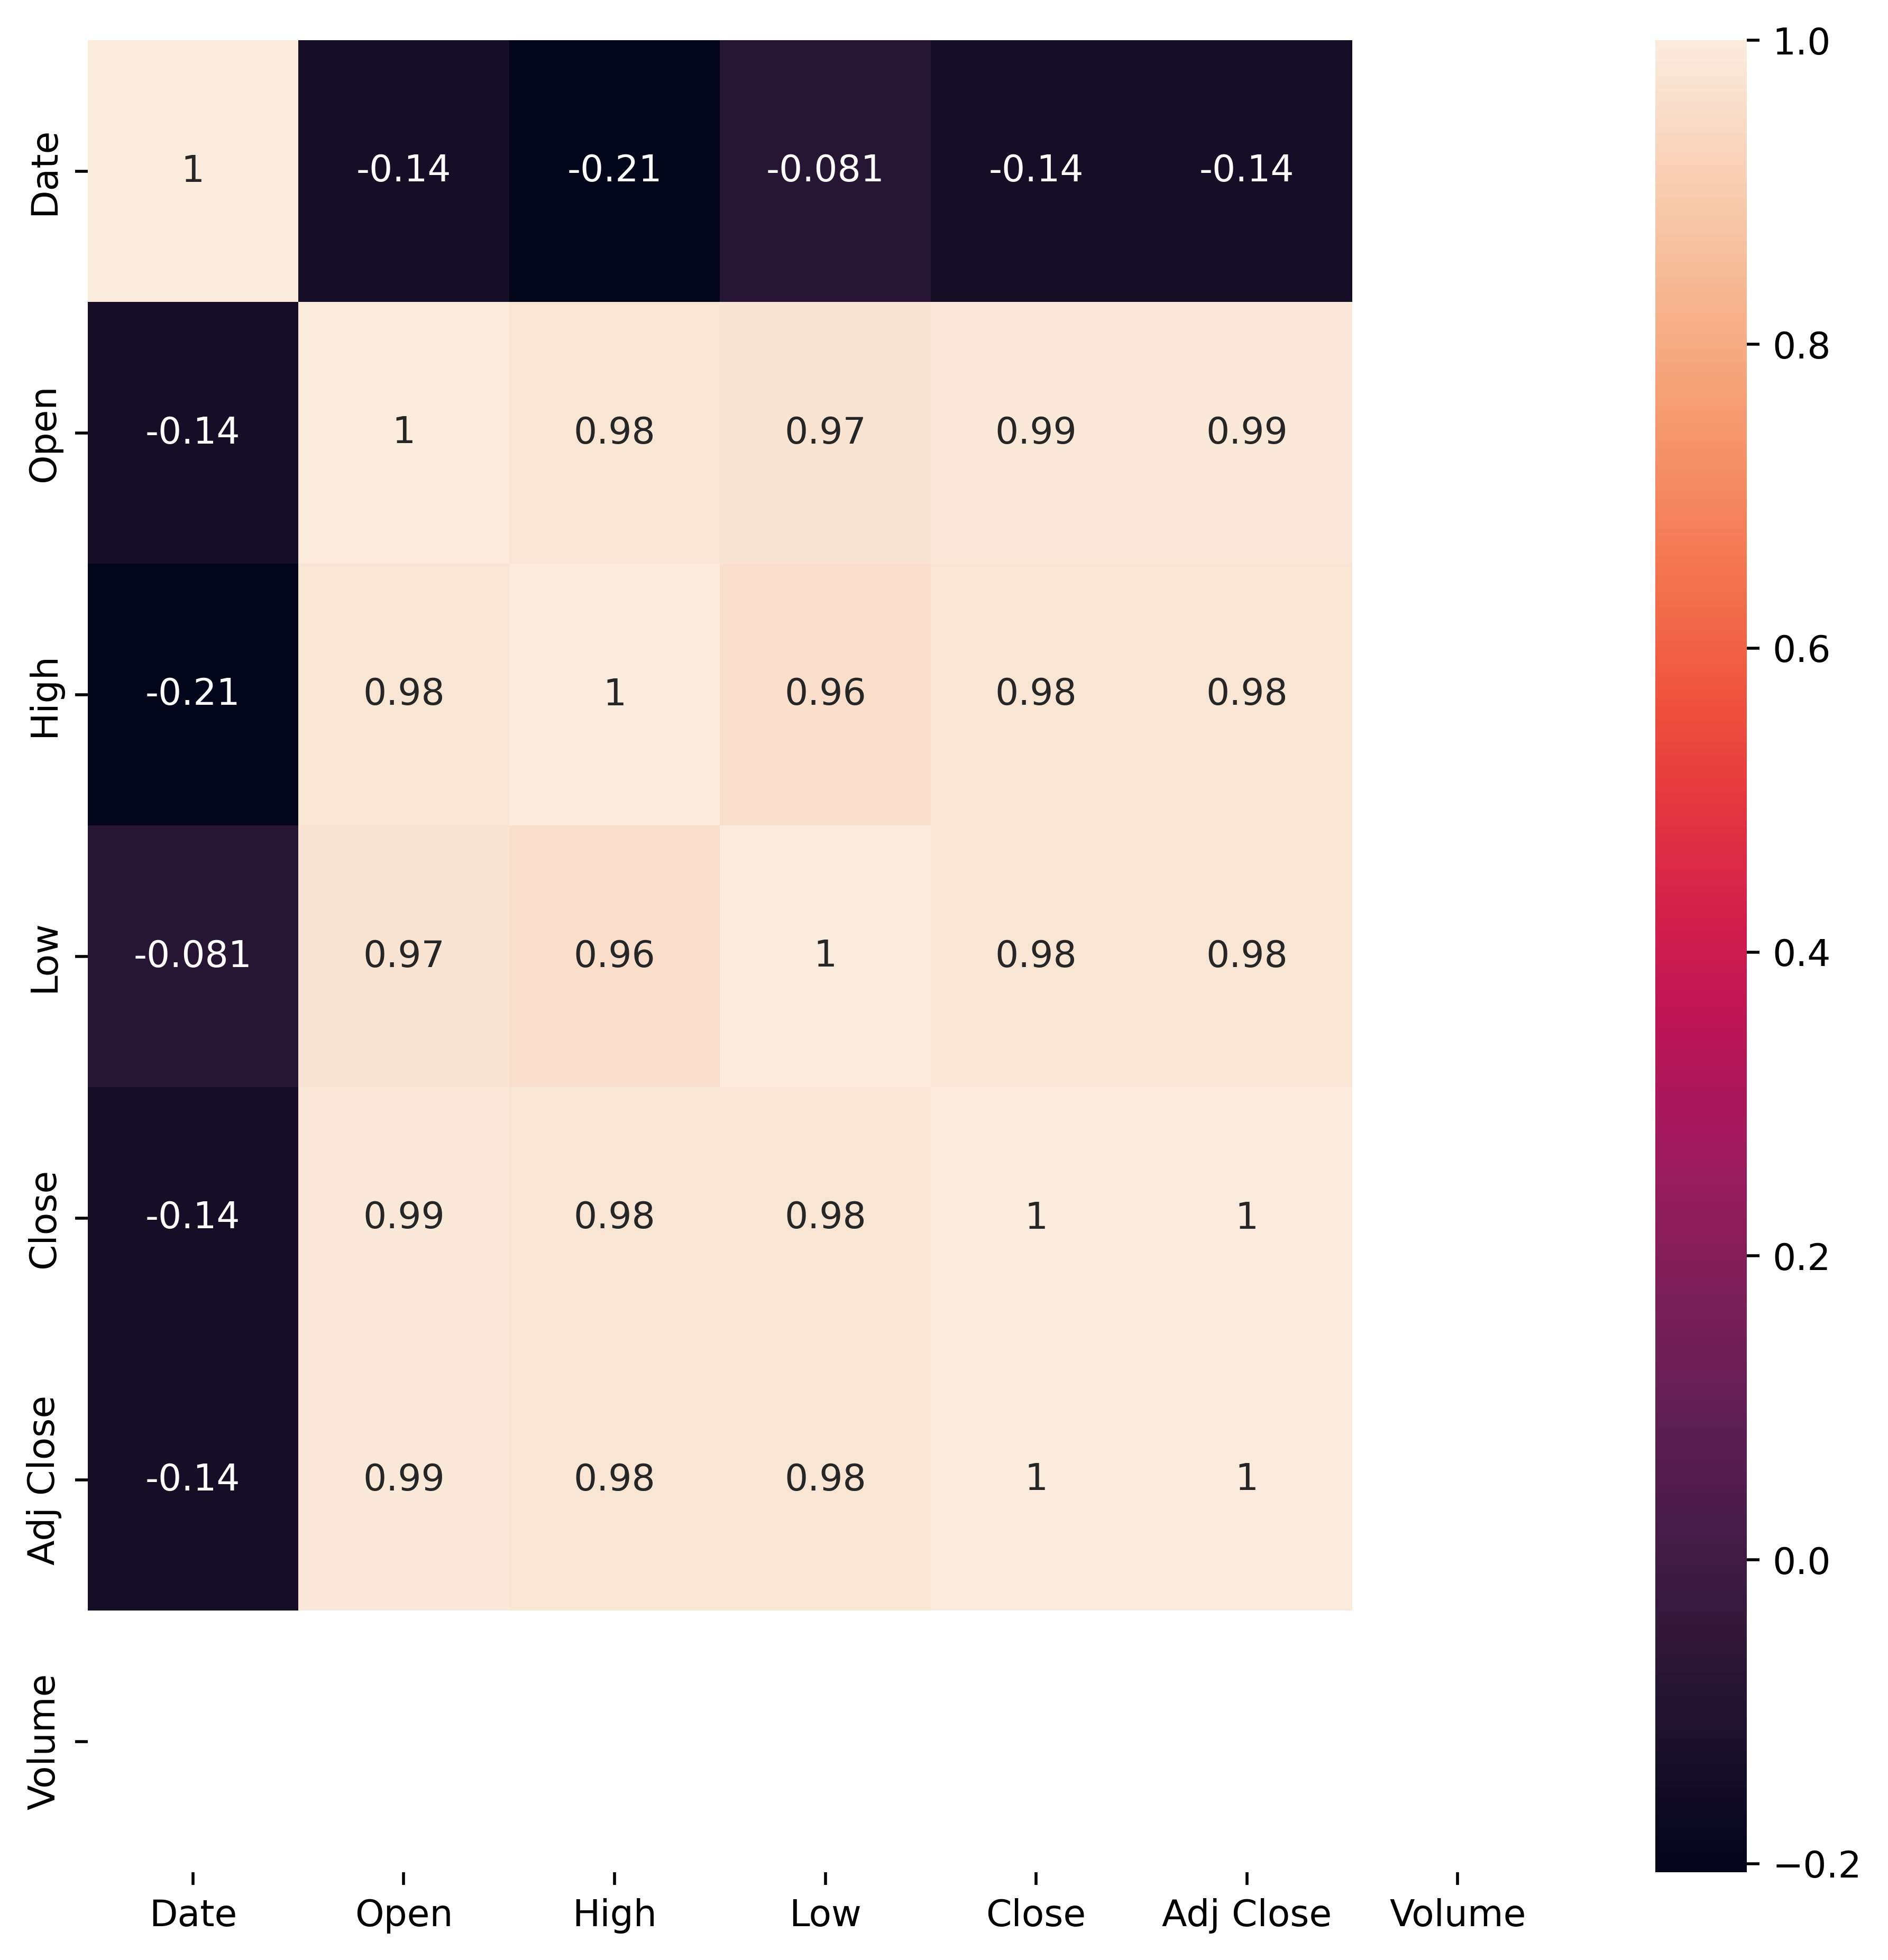

In [32]:
#Lets analyse the correlation between each variable
plt.figure(figsize=(9,9),dpi = 500)
sns.heatmap(df1.corr(),annot = True)

In [34]:
df1.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,0,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,1,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,3,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,4,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [24]:
"""### *Segregate Dataset into Input X & Output Y*"""

X = df1.iloc[:, :-1].values
X

Y = df1.iloc[:, -1].values
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
"""### *Splitting Dataset for Testing our Model*"""

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


In [33]:
# lets create a predictive model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred))

ValueError: ignored

In [26]:
# Training Dataset using Support Vector Regression

from sklearn.svm import SVR
model = SVR()
model.fit(x_train,y_train)


SVR()

In [27]:
# *Prediction for all test data for validation*
#*SSres is the sum of squares of the residual errors.*
#*SStot is the total sum of the errors.*
#![image.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAP0AAAA7CAYAAACwhIxVAAAJYElEQVR4Ae2b+W9VRRTH+W/8wcQfSDQSMUQREhEEEQlIQCSCElIQZK9FKWBZLEuoIMgSGnYBAdkCyCphLbKWpUAFWVpKsZSG5acx3zHndnrfu++92/fu0jffH5p5vcss55zPnDNn5rZ7+fKl4h9lQBuwxwbaUdn2KJu6pq5hA4SekQ4jPctsgNBbpnB6e3p7Qk/o6ektswFCb5nC6enp6Qk9oaent8wGCL1lCqenp6cn9ISent4yGyD0limcnp6entATenp6y2yA0FumcHp6enpCT+jp6S2zAUJvmcLp6enpCT2hp6e3zAYIvWUKp6enpyf0hJ6e3jIbiBz658+fqz8OHVEfffqZeqV9B9X9kwFq5559CtfpleiVaAO5t4HIod+2Y7d69Y23NfCAHn/tO3ZWR44dJ/SWeSACnnvAk8k0cugf1NSoktIF6vadf7R337T1dw3+T0uXE3pCTxsIwAYih949Ex07cUpDv6J8DRUegMLd8ub/4XjXOMk5VtA/e/ZMzZlfpl7v1FWdrviL0Ocx9ND1jDnz9ARftmSZevHiBfUdkr4DgX795t+0MmWNjhIgjxw3WZ27cDGpgqH0DZu36vX9vLKfFYwirNmxsbFRt93p/Z663+h/WG1LOzdvVavC4h/UW10+0H1AOX32XIXr8oyU9x/UqLlli9W73XvrZyHbCVOKPWUr78WpvHGrWnXt1Vd17NpDXbxcmTDGTPuKhO/BI3+qz4ePVK+92UnLA0nhVWvWq4aGJwn1+pFzpn1oa8+FBr1MAFDM/oOHWygDwCOhB+PF+h4QhiFIGMXqDb8qgV36GDb0SFpi7NK+WY6eWKSePGk23sor1zQs5jPyu8/AIaq29mEosstWP+VrN+jxTpwyTT1tampVn+EY4CBk/O7SrUc/cs52fHF+P1DoxQgxG5+/eEn17DdIK8g0ZChuyYpynbEHgGF6+AOHjzo7B30HfaG9DgzHbSxBKvBRfb0a/FWBlsuIMRN0QhOTIORw/tJltWTFKgf6pqYmNXnqDP0sZIsJALLFX9XNWwph8sO6ulYBFOQY3XWjjwOHjch6l+bM2XO6Duhsefka9W9Dgx47yl179+utX2nbj5zlnXwtQ4FehIfkHBQkkwGuS7bePUubz8j7uS5hfN8Wl6iKc+dVTW2t7lfY0F+vuqHe6/GxlsvajZtTAov+9hs8VD9bUjo/6TIp1zIKor59Bw7ryRaTnIDamnbEdhCpYQJMVYcfOaeqJx/uhQY9vBc8EaCC4YpHgld1A4//w4DeVCDCYrQZNvQmyO9066UAhFe00/j0qRpb+L3uI5YD6zZtCW0pZMoqm9+AHLBDzljSZVPXiVNnnEhtaMFoVXXjpudE6EfO2fSpLbwbCvQwYhgzjBrK9pOtxXoWywG85/U3a97CrIwHiooKejOBKeNDEg+7GNV/304Yl3tdCvgR8l++ctXT4ONkiCfPVOiQvPeAweruvXsJ4/PTV0wgMgmK7JDEQ0LYncTzK2c//WhrzwYKvShCSpy8K55VquofP85Y2fkOPQwGk+KmrdsTEopIei5btbqF54fxIluN48oiV5SQLbL92YTLQRsvxpnrbbrah3XapiRzLzLp8mEfhUjAHJMfOZvv5dvvUKEvmj4ztkaZiac3nxHjQpmrpQiMEoeThn89zglbATMmBLfhIXl34VKlmvTddGerCn1ZsHhpi0nC/V6U/+dqmy7ZGOrrH2sPb06G2BK8er0qQXZ+5JysrbZ+LVDoAQMSZKcqzjrbTIt+WRnLMNQE2it7bz4TBPSmMeFwkiyHEMJiPW/eN38DJslHmPkS85k4/M7FNl26cQDolavXOVEQkn2p3kklZ7yLXYYr166nrCNV/bmoI1X9rbkXOPQABR0ThWP2hZFm2lkbwvtkssCadNT4Qm286aBHyI9sPiaiuEKPRBoAQuSCrdJkY87VNWTy5exFOuhTyRm5Iky82UCfizpyJRepJzTo8UGN7NMzkdd83htbSViLI8Elh3CwH79j917nwA4mTCgM4BTP/FEdOnpMYd8Z1+DZjp887URSWDPjGu7JdwxI/iE3gHUvEl2VV5u3t7AmnjarVLcFILG0MENiHJzZuGWbU39rlzNyJgIn5zAOMcBsyu279ihEjnAiMmbULROgedrPj5wBqhnJyW9zGYf2sPsgywkkXxcvW+nspmRSRzZjz+bd0KCHN5ItO7/ePpsBpnoXM7iE0KJYdwlwUtWR7b10fQAkd+/d133wWl5In7v16d8CaIEeZxEAtDwnh6MwyYwvmupcl/tmZh2Tj1yX0jT+TMaPiQMn7/B+ttt0Znte271oB+M18xt+5JwOWNgyJmJTpiIbWb6mq8McR9i/Q4MeA5NEDgTkx9sHJZR0hoB+Bg09EnLw1Ajl5dw9PDJg37Zzd4sjqjA2bM3hjL6cu4fh4TRhsrPmAj2eQV11jx6pYQVjnMSjnGjDjgrCXMA5e/7/Xk7GjfAYcvhm8hR9th9RiF994HsLeF1zMvFbR7Ln0Wdsz/Uf8qWTzIQMMcG4v/HwI2dpC+AmC+8RTWAZBeeFk6bQC74fwP/u5ZVXHdJGFGUg0EcxELbZvGQQWQj08PTJzrfLffFSZinQ4zsIeC/5NgATEpYQmW67IgzO9TadjC/o0gtYcRYSMaEfkntyR0FedQTd91T1E/qQPmdMpYSg7gnUXrsRcqJNn52oT312Qs73F4ydpD1/ugSZjEmiO3N9LffiXgLYDp27JXzm7fb0kA08Pjw9vqOQfAvG51VHlGMn9BZDD+PFMsL08Phteqtk62YsF/BBS5SGG0bbpQsXtZCNyAXRC/IFbrlBLu4zFV51hNF/rzYIvcXQwyhwFLZoWokTvqeDHtl/JOMkW+5lWPlwvfr2HTVqQqGTLxDoMTYse5CtlzwMsvjJ5JKqjqhkROjzGPqojIrtJuZX4iQTQk/o8z5MjxNwcegLoSf0hN4yGyD0lik8Dp6GfYg2/Cf0hJ6e3jIbIPSWKZxeNlovGwf5E3pCT09vmQ0QessUHgdPwz5EG20QekJPT2+ZDRB6yxROLxutl42D/Ak9oaent8wGCL1lCo+Dp2Efoo02CD2hp6e3zAYIvWUKp5eN1svGQf6EntDT01tmA4TeMoXHwdOwD9FGG4Se0NPTW2YDhN4yhdPLRutl4yB/Qk/o6ektswFCb5nC4+Bp2Idoo43/AAMbmhGjHVGdAAAAAElFTkSuQmCC)

ypred = model.predict(x_test)

In [28]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,ypred)
rmse=np.sqrt(mse)
print("Root Mean Square Error:",rmse)
r2score = r2_score(y_test,ypred)
print("R2Score",r2score*100)

Root Mean Square Error: 0.0
R2Score 100.0
